# Where should a drinks company run promotions?

## 📖 Background
Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

### The data
The marketing team has sourced you with historical sales volumes per capita for several different drinks types.

- "year" - year (1998-2016)
- "region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast
- "wine" - sale of wine in litres by year per capita
- "beer" - sale of beer in litres by year per capita
- "vodka" - sale of vodka in litres by year per capita
- "champagne" - sale of champagne in litres by year per capita
- "brandy" - sale of brandy in litres by year per capita

## 💪 Competition Challenge

1. Recommend 10 additional regions they should select for the promotion.
2. Tell the story that supports your recommendations.

# Exploratory Data Analysis

In [1]:
import pandas as pd

# Missing Data Package
import missingno as msno

# Plot visualization
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import FuncFormatter

# Algorithms
from sklearn.cluster import KMeans as KNN

# Customization
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv(r'./data/russian_alcohol_consumption.csv')
df.head(10)

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
5,1998,Republic of Bashkortostan,1.8,17.5,10.7,0.9,0.2
6,1998,Belgorod Oblast,3.4,23.0,10.8,0.9,0.1
7,1998,Bryansk Oblast,3.4,32.4,9.7,0.5,0.1
8,1998,Republic of Buryatia,1.1,8.8,15.8,0.9,0.1
9,1998,Vladimir Oblast,1.5,16.6,16.8,0.5,0.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [4]:
years = df['year'].unique()
len(years)

19

In [5]:
regions = df['region'].unique()
len(regions)

85

<AxesSubplot:>

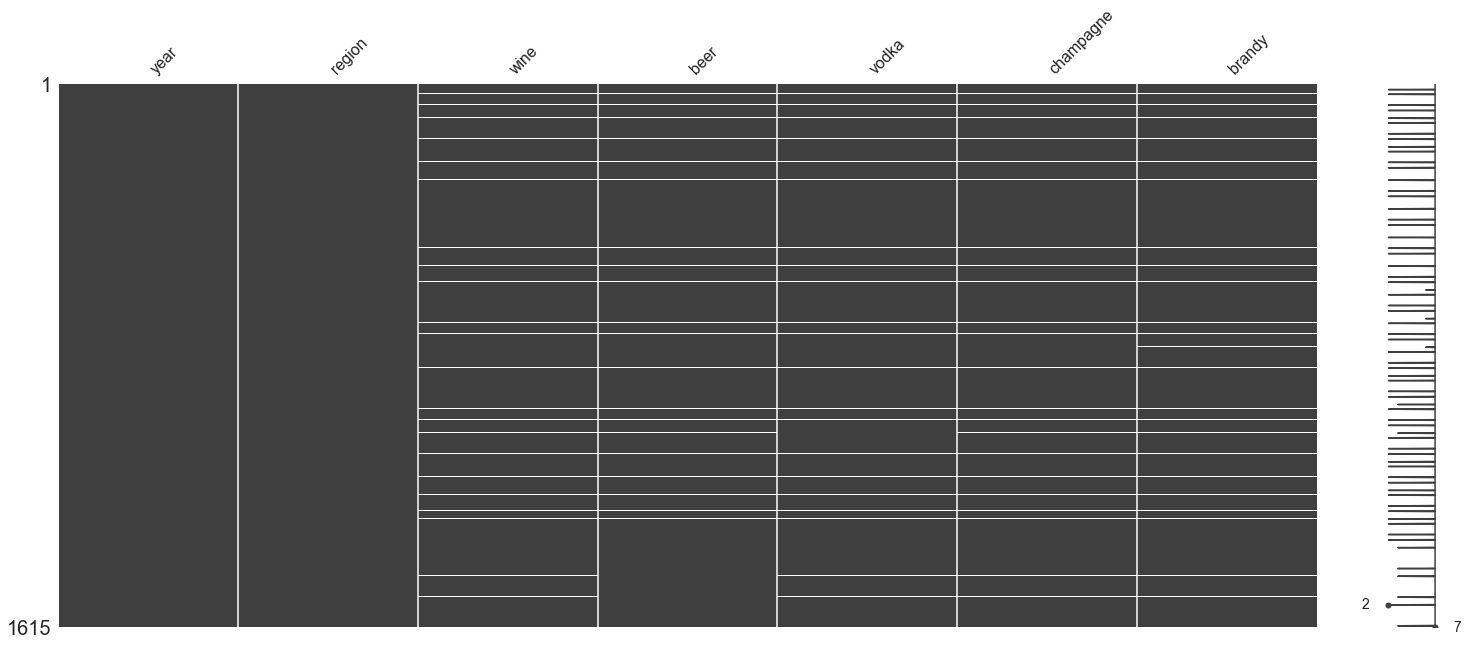

In [6]:
msno.matrix(df)

## Thoughts

So far, I can see there are 85 unique regions in Russia with data collected from 1998 to 2016. The graph above shows that some rows have no data.

year          0
region        0
wine         63
beer         58
vodka        61
champagne    63
brandy       66
dtype: int64

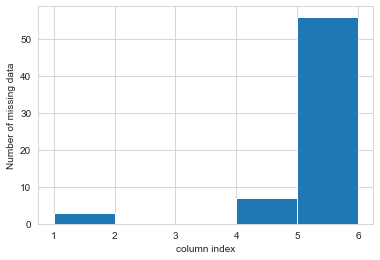

In [7]:
# Total number of missing data per row
nMissing_row = df.isna().sum(axis=1)
nMissing_row[nMissing_row > 0].hist(bins = [1,2,3,4,5,6])
plt.xlabel('column index')
plt.ylabel('Number of missing data')

# Total number of missing data per column
nMissing_col = df.isna().sum(axis=0)
nMissing_col

## Thoughts

From the information above, we have MNAR case. There are 50+ rows that do not have any data on the alcohol drinks for a given region and year. Before deleting these rows, I need to determine what regions and years the information is missing from.

In [8]:
df_missing = df.copy(deep=True)
df_missing.iloc[:,2:] = df.iloc[:,2:].isna()
df_missing

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,False,False,False,False,False
1,1998,Altai Krai,False,False,False,False,False
2,1998,Amur Oblast,False,False,False,False,False
3,1998,Arkhangelsk Oblast,False,False,False,False,False
4,1998,Astrakhan Oblast,False,False,False,False,False
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,False,False,False,False,False
1611,2016,Chukotka Autonomous Okrug,False,False,False,False,False
1612,2016,Sakha (Yakutia) Republic,False,False,False,False,False
1613,2016,Yamalo-Nenets Autonomous Okrug,False,False,False,False,False


In [9]:
df_missing_year = df_missing.groupby('year').sum()
df_missing_year

,wine,beer,vodka,champagne,brandy
year,,,,,
1998,4,4,4,4,4
1999,4,4,4,4,4
2000,4,4,4,4,4
2001,3,3,3,3,3
2002,3,3,3,3,3
2003,3,3,3,3,3
2004,3,3,3,3,3
2005,3,3,3,3,4
2006,3,3,3,3,4


In [10]:
df_missing_region = df_missing.groupby('region').sum()
df_missing_region.drop(columns = 'year', inplace = True)

# Get Regions with missing Data
df_missing_region[ df_missing_region.sum(axis=1) > 0 ]

,wine,beer,vodka,champagne,brandy
region,,,,,
Chechen Republic,19,16,19,19,19
Republic of Crimea,16,16,16,16,16
Republic of Ingushetia,12,10,10,12,15
Sevastopol,16,16,16,16,16


In [11]:
df[ df['region'] == 'Chechen Republic']

,year,region,wine,beer,vodka,champagne,brandy
79,1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN
164,1999,Chechen Republic,NaN,NaN,NaN,NaN,NaN
249,2000,Chechen Republic,NaN,NaN,NaN,NaN,NaN
334,2001,Chechen Republic,NaN,NaN,NaN,NaN,NaN
419,2002,Chechen Republic,NaN,NaN,NaN,NaN,NaN
504,2003,Chechen Republic,NaN,NaN,NaN,NaN,NaN
589,2004,Chechen Republic,NaN,NaN,NaN,NaN,NaN
674,2005,Chechen Republic,NaN,NaN,NaN,NaN,NaN
759,2006,Chechen Republic,NaN,NaN,NaN,NaN,NaN
844,2007,Chechen Republic,NaN,NaN,NaN,NaN,NaN


In [12]:
df[ df['region'] == 'Republic of Crimea']

,year,region,wine,beer,vodka,champagne,brandy
31,1998,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
116,1999,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
201,2000,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
286,2001,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
371,2002,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
456,2003,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
541,2004,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
626,2005,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
711,2006,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
796,2007,Republic of Crimea,NaN,NaN,NaN,NaN,NaN


In [13]:
df[ df['region'] == 'Republic of Ingushetia']

,year,region,wine,beer,vodka,champagne,brandy
17,1998,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
102,1999,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
187,2000,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
272,2001,Republic of Ingushetia,9.9,9.5,4.00,1.3,1.5
357,2002,Republic of Ingushetia,7.5,8.7,4.30,0.8,0.8
442,2003,Republic of Ingushetia,6.0,8.9,4.60,0.8,0.5
527,2004,Republic of Ingushetia,6.4,7.4,3.60,0.8,0.8
612,2005,Republic of Ingushetia,0.2,0.8,0.80,0.1,NaN
697,2006,Republic of Ingushetia,0.3,0.9,1.00,0.1,NaN
782,2007,Republic of Ingushetia,0.3,1.0,1.00,0.1,NaN


In [14]:
df[ df['region'] == 'Sevastopol']

,year,region,wine,beer,vodka,champagne,brandy
63,1998,Sevastopol,NaN,NaN,NaN,NaN,NaN
148,1999,Sevastopol,NaN,NaN,NaN,NaN,NaN
233,2000,Sevastopol,NaN,NaN,NaN,NaN,NaN
318,2001,Sevastopol,NaN,NaN,NaN,NaN,NaN
403,2002,Sevastopol,NaN,NaN,NaN,NaN,NaN
488,2003,Sevastopol,NaN,NaN,NaN,NaN,NaN
573,2004,Sevastopol,NaN,NaN,NaN,NaN,NaN
658,2005,Sevastopol,NaN,NaN,NaN,NaN,NaN
743,2006,Sevastopol,NaN,NaN,NaN,NaN,NaN
828,2007,Sevastopol,NaN,NaN,NaN,NaN,NaN


# Thoughts

From the information above, we can drop the following:

- Chechen Republic due to the lack of data for any alcoholic drink
- Republic of Ingushetia due to the lack of recent ( within 5 years ) of data for any alcoholic drink

I'll keep the Republic of Crimea and Sevastopol since both regions contain full data on alcoholic drinks from within the last 3 years.

In [15]:
# Drop the regions from aboce

df_V2 = df[ (df['region'] != "Chechen Republic") & (df['region'] != "Republic of Ingushetia") ]
df_V2

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


# Thoughts

I am interested to know the dominance of wine compare to the other drinks. I can add the columns of each row to determine the total number of litres sales per year per capita and find the percentage of wine liter sales.

In [16]:
df[ df['region'] == 'Saint Petersburg']

,year,region,wine,beer,vodka,champagne,brandy
59,1998,Saint Petersburg,2.7,27.90,12.30,1.20,0.50
144,1999,Saint Petersburg,2.6,57.40,13.00,1.70,0.60
229,2000,Saint Petersburg,4.4,68.20,14.70,2.00,0.90
314,2001,Saint Petersburg,6.2,101.00,15.50,2.40,0.80
399,2002,Saint Petersburg,6.3,104.60,17.20,2.60,0.90
484,2003,Saint Petersburg,6.6,105.60,14.30,2.80,1.00
569,2004,Saint Petersburg,4.7,103.90,13.90,2.50,0.80
654,2005,Saint Petersburg,10.3,104.80,16.20,2.40,1.10
739,2006,Saint Petersburg,7.6,125.30,16.40,2.40,1.40
824,2007,Saint Petersburg,9.1,106.40,14.00,2.70,1.40


In [17]:
df_V2['Total Sales'] = df_V2.loc[:,'wine':'brandy'].sum(axis = 1)

df_V2.loc[:,'wine':'brandy'] = df_V2.loc[:,'wine':'brandy'].apply( lambda x: (x/ df_V2['Total Sales']) * 100 ) 

df_SaintPeterburg = df_V2[ df_V2['region'] == 'Saint Petersburg']

df_SaintPeterburg

/var/folders/_6/jplnpf590f180r_srq2j11zm0000gn/T/ipykernel_8009/1744422002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V2['Total Sales'] = df_V2.loc[:,'wine':'brandy'].sum(axis = 1)
/Users/father/opt/anaconda3/envs/minimal_ds/lib/python3.9/site-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,year,region,wine,beer,vodka,champagne,brandy,Total Sales
59,1998,Saint Petersburg,6.053812,62.556054,27.578475,2.690583,1.121076,44.60
144,1999,Saint Petersburg,3.452855,76.228420,17.264276,2.257636,0.796813,75.30
229,2000,Saint Petersburg,4.878049,75.609756,16.297118,2.217295,0.997783,90.20
314,2001,Saint Petersburg,4.924543,80.222399,12.311358,1.906275,0.635425,125.90
399,2002,Saint Petersburg,4.787234,79.483283,13.069909,1.975684,0.683891,131.60
484,2003,Saint Petersburg,5.065234,81.043745,10.974674,2.148887,0.767460,130.30
569,2004,Saint Petersburg,3.736089,82.591415,11.049285,1.987281,0.635930,125.80
654,2005,Saint Petersburg,7.640950,77.744807,12.017804,1.780415,0.816024,134.80
739,2006,Saint Petersburg,4.964076,81.841933,10.711953,1.567603,0.914435,153.10
824,2007,Saint Petersburg,6.811377,79.640719,10.479042,2.020958,1.047904,133.60


Text(0.5, 0, 'Year')

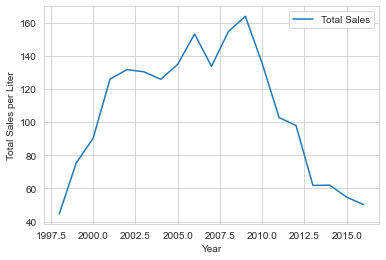

In [18]:
df_SaintPeterburg.plot(x='year',y='Total Sales')
plt.ylabel('Total Sales per Liter')
plt.xlabel('Year')

In [19]:
df_SaintPeterburg_melted = df_SaintPeterburg.melt(id_vars=['year','region','Total Sales'], value_vars = ['wine','beer','vodka','champagne','brandy'],var_name='Type',value_name='Sale Percentage')
df_SaintPeterburg_melted

,year,region,Total Sales,Type,Sale Percentage
0,1998,Saint Petersburg,44.6,wine,6.053812
1,1999,Saint Petersburg,75.3,wine,3.452855
2,2000,Saint Petersburg,90.2,wine,4.878049
3,2001,Saint Petersburg,125.9,wine,4.924543
4,2002,Saint Petersburg,131.6,wine,4.787234
...,...,...,...,...,...
90,2012,Saint Petersburg,97.9,brandy,1.327886
91,2013,Saint Petersburg,61.8,brandy,1.618123
92,2014,Saint Petersburg,61.9,brandy,2.100162
93,2015,Saint Petersburg,54.7,brandy,2.376600


(1998.0, 2016.0)

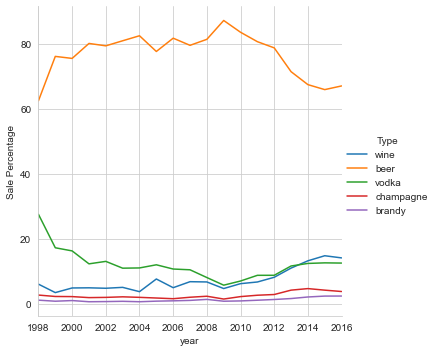

In [20]:
sns.relplot(x='year',y='Sale Percentage',data = df_SaintPeterburg_melted , hue = 'Type',kind ='line')
plt.xlim([1998,2016])


# Thoughts

There is a steep increase in alcohol sales per liter from 1998 to 2009, with beer having an 80% dominance of the total sales per liter per capital. However, in 2009, the sales of alcohol began to drop steadily. Beer lost a portion of it's domiance and the other drinks began to increase in sales. By 2016, wine was the second most sold drink in Saint Peterburg with a 14.1% dominance in total sales per liter per capital.

# Where to go from here

Given the inflection point in 2009, it would be ideal that we find regions that follow Saint Peterburgs trend on decreasing the sales of beer and increasing the sales of the other drinks. Thus, we'll only observe the years from 2009 to 2016. In addition, we'll use K-Mean algorithm to find the regions closely related to Saint Peterburg. 

In [21]:
df_V3 = df_V2[ df_V2['year'] >= 2009 ]
df_V3.fillna(value = -1,inplace = True)

df_V3

/Users/father/opt/anaconda3/envs/minimal_ds/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,year,region,wine,beer,vodka,champagne,brandy,Total Sales
935,2009,Republic of Adygea,14.020619,64.948454,15.257732,3.298969,2.474227,48.5
936,2009,Altai Krai,5.792683,78.658537,12.957317,2.134146,0.457317,65.6
937,2009,Amur Oblast,7.309322,79.766949,11.122881,1.271186,0.529661,94.4
938,2009,Arkhangelsk Oblast,16.353111,56.005789,23.010130,3.039074,1.591896,69.1
939,2009,Astrakhan Oblast,6.562848,82.313682,9.677419,1.001112,0.444939,89.9
...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,8.912656,75.401070,13.725490,1.247772,0.713012,56.1
1611,2016,Chukotka Autonomous Okrug,7.442748,64.885496,22.137405,3.435115,2.099237,52.4
1612,2016,Sakha (Yakutia) Republic,6.064880,79.125529,11.565585,2.538787,0.705219,70.9
1613,2016,Yamalo-Nenets Autonomous Okrug,4.918033,82.841530,8.961749,1.857923,1.420765,91.5


In [22]:
x = df_V3[['year','wine','beer','vodka','champagne','brandy','Total Sales']]
y = df_V3['region']

KNN_classifier = KNN(n_clusters=5)

KNN_classifier.fit(x,y)

df_V3['Cluster'] = KNN_classifier.labels_



/var/folders/_6/jplnpf590f180r_srq2j11zm0000gn/T/ipykernel_8009/2166830979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V3['Cluster'] = KNN_classifier.labels_


In [23]:
df_V3[df_V3['region'] == 'Saint Petersburg']

,year,region,wine,beer,vodka,champagne,brandy,Total Sales,Cluster
994,2009,Saint Petersburg,4.700855,87.301587,5.738706,1.465201,0.793651,163.80,4
1079,2010,Saint Petersburg,6.208426,83.665928,7.021434,2.217295,0.886918,135.30,4
1164,2011,Saint Petersburg,6.719907,80.765485,8.774834,2.639268,1.100506,102.68,4
1249,2012,Saint Petersburg,8.171604,78.855975,8.784474,2.860061,1.327886,97.90,1
1334,2013,Saint Petersburg,11.003236,71.521036,11.650485,4.207120,1.618123,61.80,0
1419,2014,Saint Petersburg,13.247173,67.528271,12.439418,4.684976,2.100162,61.90,0
1504,2015,Saint Petersburg,14.808044,65.996344,12.614260,4.204753,2.376600,54.70,0
1589,2016,Saint Petersburg,14.143426,67.131474,12.549801,3.784861,2.390438,50.20,0


1    264
0    223
4    116
2     42
3     19
Name: Cluster, dtype: int64

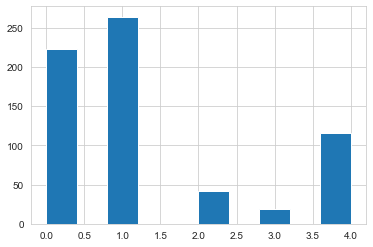

In [24]:
df_V3['Cluster'].hist()

df_V3['Cluster'].value_counts()

# Thoughts

From the K-Mean Algorithm, the last four years of data from Saint Petersburg were contained in Cluster 4. We'll use Cluster 4 to search for regions that are closer related to Saint Peterburg by adding 5 characteristics: alcohol sales for wine, beer, vodka, champagne, and brady.

In [25]:
df_combine = df_V3.merge(df_V2, how='left',on=['year','region'])

df_combine.drop(columns=['Total Sales_y','Cluster'],inplace=True)

df_combine

,year,region,wine_x,beer_x,vodka_x,champagne_x,brandy_x,Total Sales_x,wine_y,beer_y,vodka_y,champagne_y,brandy_y
0,2009,Republic of Adygea,14.020619,64.948454,15.257732,3.298969,2.474227,48.5,14.020619,64.948454,15.257732,3.298969,2.474227
1,2009,Altai Krai,5.792683,78.658537,12.957317,2.134146,0.457317,65.6,5.792683,78.658537,12.957317,2.134146,0.457317
2,2009,Amur Oblast,7.309322,79.766949,11.122881,1.271186,0.529661,94.4,7.309322,79.766949,11.122881,1.271186,0.529661
3,2009,Arkhangelsk Oblast,16.353111,56.005789,23.010130,3.039074,1.591896,69.1,16.353111,56.005789,23.010130,3.039074,1.591896
4,2009,Astrakhan Oblast,6.562848,82.313682,9.677419,1.001112,0.444939,89.9,6.562848,82.313682,9.677419,1.001112,0.444939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,2016,Chuvash Republic,8.912656,75.401070,13.725490,1.247772,0.713012,56.1,8.912656,75.401070,13.725490,1.247772,0.713012
660,2016,Chukotka Autonomous Okrug,7.442748,64.885496,22.137405,3.435115,2.099237,52.4,7.442748,64.885496,22.137405,3.435115,2.099237
661,2016,Sakha (Yakutia) Republic,6.064880,79.125529,11.565585,2.538787,0.705219,70.9,6.064880,79.125529,11.565585,2.538787,0.705219
662,2016,Yamalo-Nenets Autonomous Okrug,4.918033,82.841530,8.961749,1.857923,1.420765,91.5,4.918033,82.841530,8.961749,1.857923,1.420765


In [61]:
x = df_combine[['year','wine_x','beer_x','vodka_x','champagne_x','brandy_x','Total Sales_x','wine_x','beer_x','vodka_x','champagne_x','brandy_x']]
y = df_combine['region']

KNN_classifier = KNN(n_clusters=9)

KNN_classifier.fit(x,y)

df_combine['Cluster'] = KNN_classifier.labels_


df_combine[df_combine['region'] == 'Saint Petersburg']

,year,region,wine_x,beer_x,vodka_x,champagne_x,brandy_x,Total Sales_x,wine_y,beer_y,vodka_y,champagne_y,brandy_y,Cluster
58,2009,Saint Petersburg,4.700855,87.301587,5.738706,1.465201,0.793651,163.80,4.700855,87.301587,5.738706,1.465201,0.793651,5
141,2010,Saint Petersburg,6.208426,83.665928,7.021434,2.217295,0.886918,135.30,6.208426,83.665928,7.021434,2.217295,0.886918,5
224,2011,Saint Petersburg,6.719907,80.765485,8.774834,2.639268,1.100506,102.68,6.719907,80.765485,8.774834,2.639268,1.100506,0
307,2012,Saint Petersburg,8.171604,78.855975,8.784474,2.860061,1.327886,97.90,8.171604,78.855975,8.784474,2.860061,1.327886,0
390,2013,Saint Petersburg,11.003236,71.521036,11.650485,4.207120,1.618123,61.80,11.003236,71.521036,11.650485,4.207120,1.618123,7
473,2014,Saint Petersburg,13.247173,67.528271,12.439418,4.684976,2.100162,61.90,13.247173,67.528271,12.439418,4.684976,2.100162,1
556,2015,Saint Petersburg,14.808044,65.996344,12.614260,4.204753,2.376600,54.70,14.808044,65.996344,12.614260,4.204753,2.376600,1
639,2016,Saint Petersburg,14.143426,67.131474,12.549801,3.784861,2.390438,50.20,14.143426,67.131474,12.549801,3.784861,2.390438,1


0    139
2    134
8    102
5     83
7     82
1     68
6     35
3     11
4     10
Name: Cluster, dtype: int64

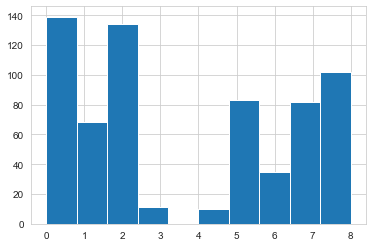

In [62]:
df_combine['Cluster'].hist()

df_combine['Cluster'].value_counts()

In [91]:
df_2016 = df_combine[ (df_combine['year']==2016) & (df_combine['Cluster'] == 1) ]

In [92]:
df_2016.sort_values(by=['Total Sales_x','wine_y'], ascending=False)

,year,region,wine_x,beer_x,vodka_x,champagne_x,brandy_x,Total Sales_x,wine_y,beer_y,vodka_y,champagne_y,brandy_y,Cluster
624,2016,Novgorod Oblast,15.406977,68.895349,12.354651,2.034884,1.308140,68.8,15.406977,68.895349,12.354651,2.034884,1.308140,1
614,2016,Leningrad Oblast,13.410596,67.880795,13.907285,2.649007,2.152318,60.4,13.410596,67.880795,13.907285,2.649007,2.152318,1
663,2016,Yaroslavl Oblast,17.142857,63.865546,14.957983,2.352941,1.680672,59.5,17.142857,63.865546,14.957983,2.352941,1.680672,1
592,2016,Vologda Oblast,14.930556,64.756944,17.187500,2.083333,1.041667,57.6,14.930556,64.756944,17.187500,2.083333,1.041667,1
632,2016,Pskov Oblast,18.055556,66.840278,11.111111,2.604167,1.388889,57.6,18.055556,66.840278,11.111111,2.604167,1.388889,1
617,2016,Mari El Republic,13.986014,66.783217,16.608392,1.398601,1.223776,57.2,13.986014,66.783217,16.608392,1.398601,1.223776,1
600,2016,Kaliningrad Oblast,15.495495,68.828829,11.171171,2.522523,1.981982,55.5,15.495495,68.828829,11.171171,2.522523,1.981982,1
660,2016,Chukotka Autonomous Okrug,7.442748,64.885496,22.137405,3.435115,2.099237,52.4,7.442748,64.885496,22.137405,3.435115,2.099237,1
639,2016,Saint Petersburg,14.143426,67.131474,12.549801,3.784861,2.390438,50.2,14.143426,67.131474,12.549801,3.784861,2.390438,1
596,2016,Zabaykalsky Krai,14.159292,68.141593,15.044248,1.991150,0.663717,45.2,14.159292,68.141593,15.044248,1.991150,0.663717,1


In [71]:
recommendation = df_2016[ df_2016['region'] != 'Saint Petersburg' ]

recommendation['region']

592               Vologda Oblast
596             Zabaykalsky Krai
600           Kaliningrad Oblast
614             Leningrad Oblast
617             Mari El Republic
624              Novgorod Oblast
632                 Pskov Oblast
643                   Sevastopol
660    Chukotka Autonomous Okrug
663             Yaroslavl Oblast
Name: region, dtype: object